fd_NIS_flat_vdp_yvnmys_nnm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


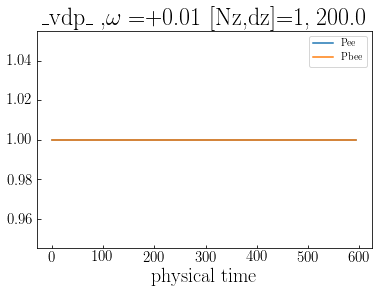

fd_NIS_flat_vdp_yvnmys_nnm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_0.0001


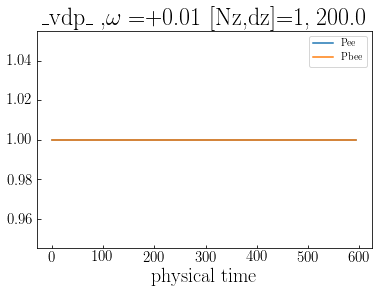

fd_NIS_flat_vip_yvnmys_nnm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


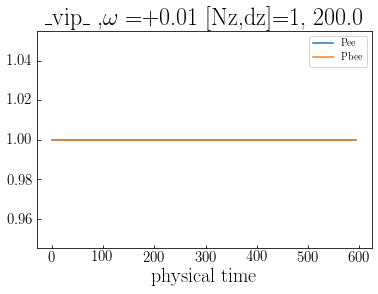

fd_NIS_flat_vip_yvnmys_nnm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_0.0001


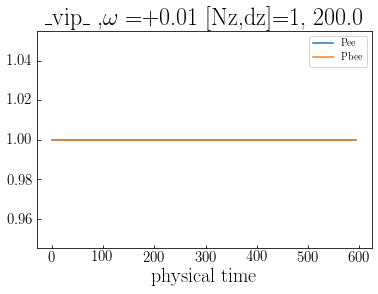

fd_NIS_flat_vdp_yvnmys_inm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


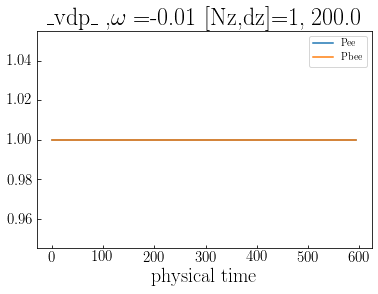

fd_NIS_flat_vdp_yvnmys_inm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_0.0001


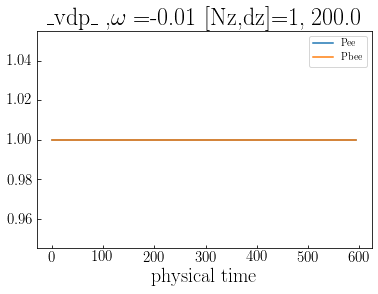

fd_NIS_flat_vip_yvnmys_inm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


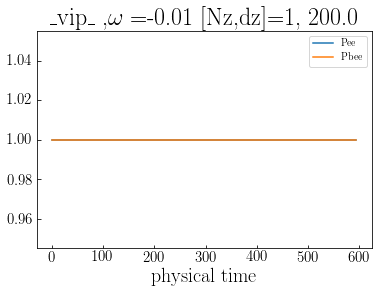

fd_NIS_flat_vip_yvnmys_inm_N1_A90_non_mu_100_Lmu_300_ar_0.7_run1
1_90_0.0001


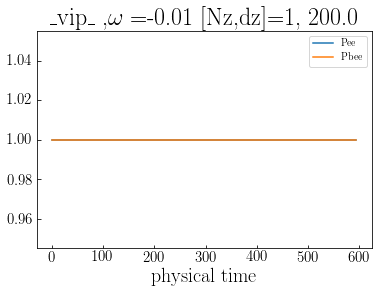

In [7]:
#plot results of the many grid results
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'NIS' not in h:
        #print('flat conti')
        continue
    """if 'hetg' not in h:
        #print('hetg pui conti')
        continue"""
    if 'N1' not in h:
        #print('n1 conti')
        continue
    if 'pb' in h:
        #print('pb conti')
        continue
    if 'yvnmys' not in h:
        #print('pb conti')
        continue
    """if 'nnm'  not in h:
        print('inm conti')
        continue"""
    cc=0
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            #print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                #print(Para,'para')
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                """if CFL !=10**-5:
                    continue"""
                #print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    print('pig exit conti')
                    #continue
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                print(h)
                print(i)
                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nz,dz]='+str(int(Nz))+', '+(str(dz))[:7])
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()

-05
['1', '2', '1e-05'] para
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_hetg_24_flat_vip_yvnmys_nnm_N1_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05


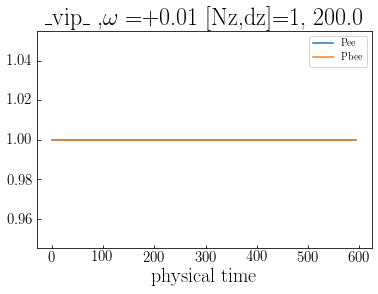

0001
['1', '2', '0.0001'] para
ist.txt
-05
['1', '2', '1e-05'] para
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_hetg_24_flat_vdp_yvnmys_nnm_N1_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05


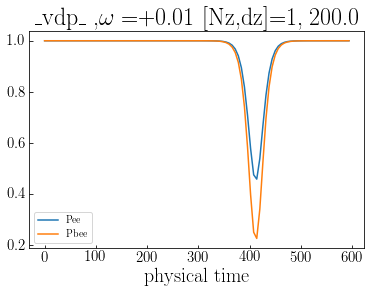

0001
['1', '2', '0.0001'] para
ist.txt
-05
['1', '2', '1e-05'] para
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_hetg_24_flat_vip_yvnmys_inm_N1_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05


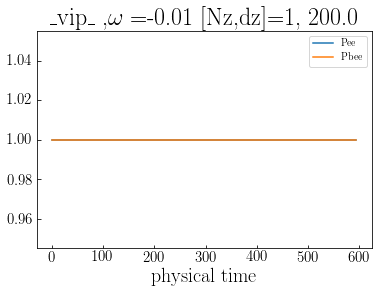

0001
['1', '2', '0.0001'] para
ist.txt
-05
['1', '2', '1e-05'] para
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_hetg_24_flat_vdp_yvnmys_inm_N1_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05


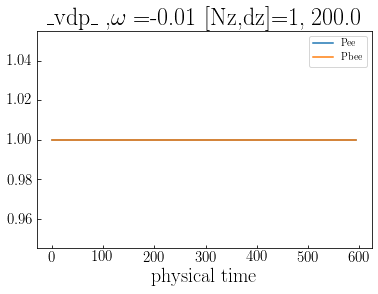

0001
['1', '2', '0.0001'] para
ist.txt


In [11]:
#plot comparison in only 2 Vz grids with normal invert mass and velo depend purturb
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'flat' not in h:
        #print('flat conti')
        continue
    if 'hetg' not in h:
        #print('hetg pui conti')
        continue
    if 'N1' not in h:
        #print('n1 conti')
        continue
    if 'pb' in h:
        #print('pb conti')
        continue
    if 'yvnmys' not in h:
        #print('pb conti')
        continue
    """if 'vdp' not in h:
        continue"""
    """if 'nnm'  not in h:
        print('inm conti')
        continue"""
    cc=0
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                print(Para,'para')
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                if CFL !=10**-5:
                    continue
                print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    print('pig exit conti')
                    #continue
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nz,dz]='+str(int(Nz))+', '+(str(dz))[:7])
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_2_1e-05


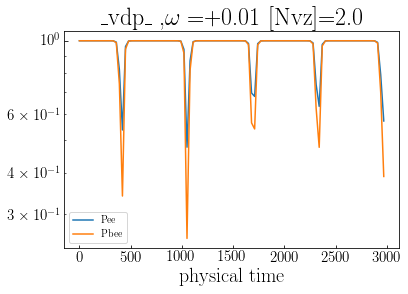

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


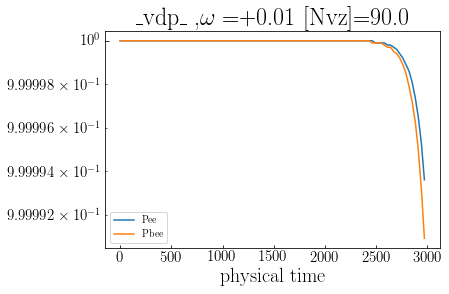

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_2_0.0001


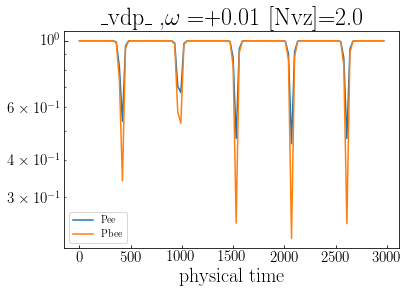

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_8_0.0001


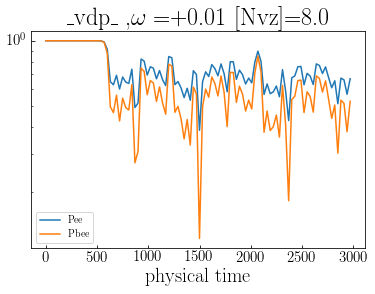

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_64_1e-05


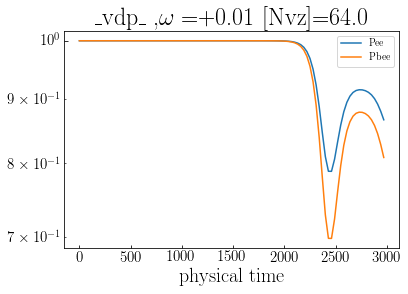

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_32_1e-05


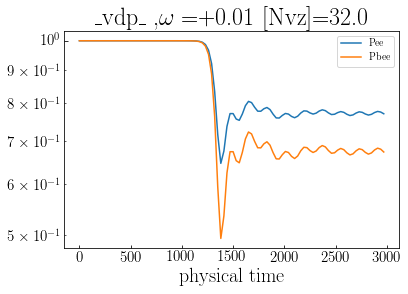

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_32_0.0001


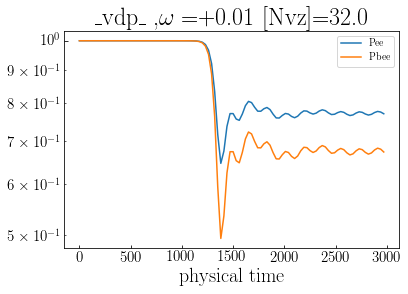

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_16_1e-05


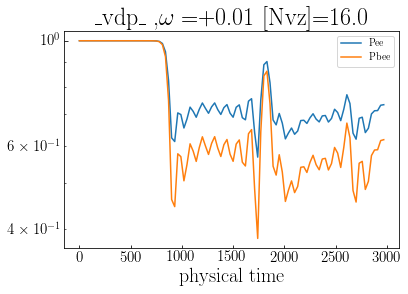

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_90_0.0001


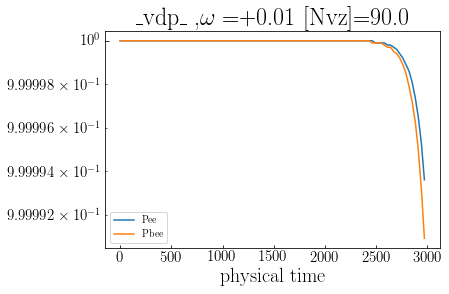

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_8_1e-05


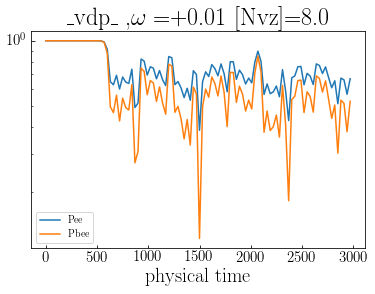

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_16_0.0001


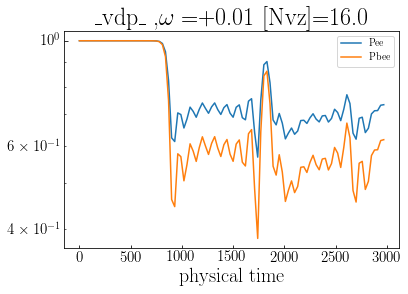

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_4_0.0001


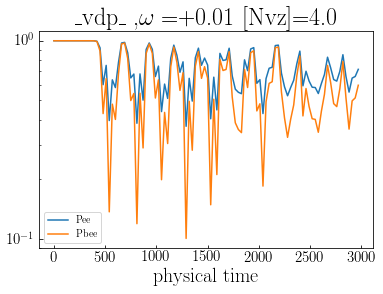

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_4_1e-05


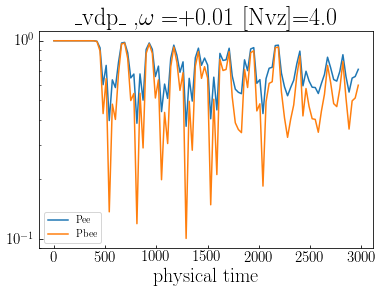

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_64_0.0001


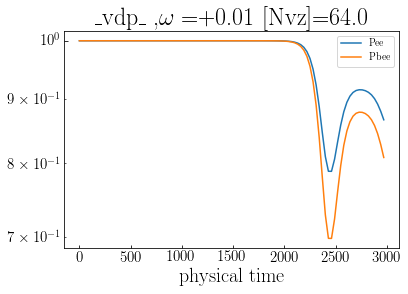

In [24]:
#plot angle beams
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'NIS' not in h:
        #print('flat conti')
        continue
    """if 'hetg' not in h:
        #print('hetg pui conti')
        continue"""
    if 'N1' not in h:
        #print('n1 conti')
        continue
    if 'N1_As_'  not in h:
        #print('pb conti')
        continue
    if 'yvnmys' not in h:
        #print('pb conti')
        continue
    if 'nnm'  not in h:
        #print('inm conti')
        continue
    if 'vdp' not in h:
        continue
    cc=0
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            #print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                #print(Para,'para')
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                """if CFL !=10**-5:
                    continue"""
                #print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    print('pig exit conti')
                    #continue
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                print(h)
                print(i)
                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nvz]='+str(Nvz))
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.yscale('log')
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_2_1e-05


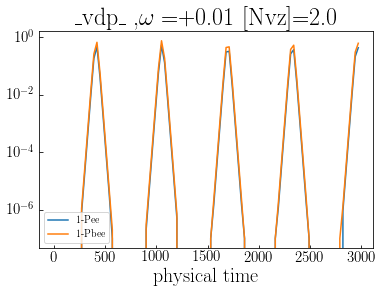

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_90_1e-05


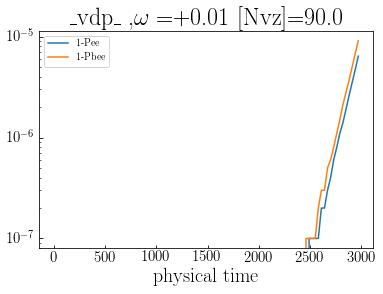

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_64_1e-05


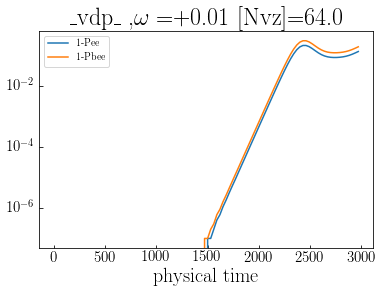

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_32_1e-05


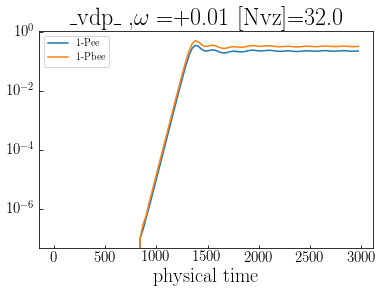

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_16_1e-05


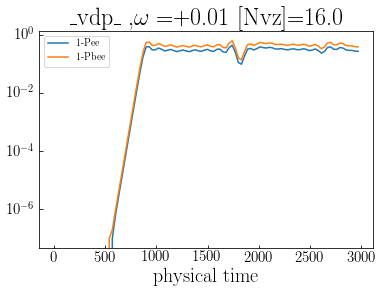

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_8_1e-05


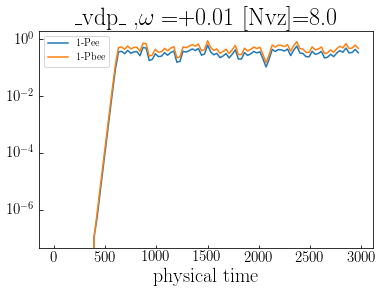

fd_NIS_flat_vdp_yvnmys_nnm_N1_As_non_mu_100_Lmu_300_ar_0.7_run1
1_4_1e-05


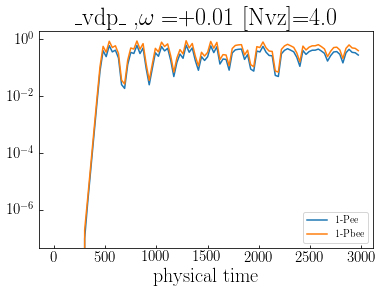

In [23]:
#plot angle beams grow
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'NIS' not in h:
        #print('flat conti')
        continue
    """if 'hetg' not in h:
        #print('hetg pui conti')
        continue"""
    if 'N1' not in h:
        #print('n1 conti')
        continue
    if 'N1_As_'  not in h:
        #print('pb conti')
        continue
    if 'yvnmys' not in h:
        #print('pb conti')
        continue
    if 'nnm'  not in h:
        #print('inm conti')
        continue
    if 'vdp' not in h:
        continue
    cc=0
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            #print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                #print(Para,'para')
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                if CFL !=10**-5:
                    continue
                #print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    print('pig exit conti')
                    #continue
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                print(h)
                print(i)
                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                DATA["1-Pee"]=1-DATA["Pee"]
                DATA["1-Pbee"]=1-DATA["Pbee"]
                if len(DATA.index[DATA['1-Pee']>0].tolist()) == 0:
                    plt.plot([1,2,3],[2,3,4])
                    plt.title('this system is stable so no fig')
                    plt.savefig(pign)
                    continue
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["1-Pee","1-Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nvz]='+str(Nvz))
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.yscale('log')
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_2_1e-05


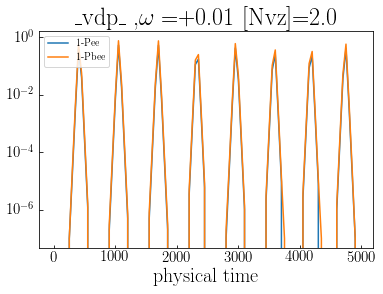

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_90_1e-05


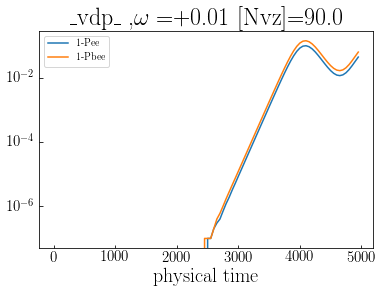

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_64_1e-05


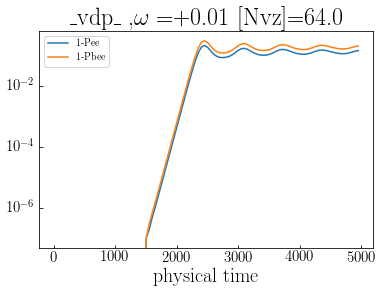

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_32_1e-05


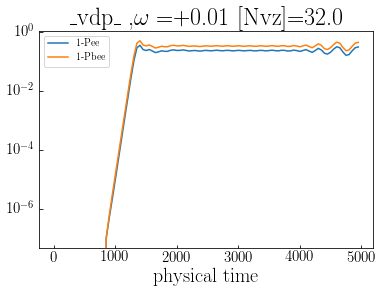

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_16_1e-05


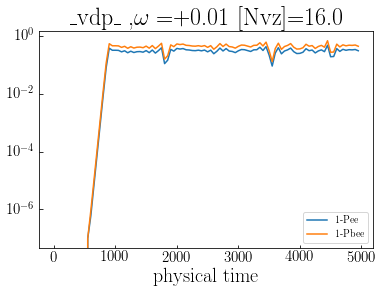

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_120_1e-05


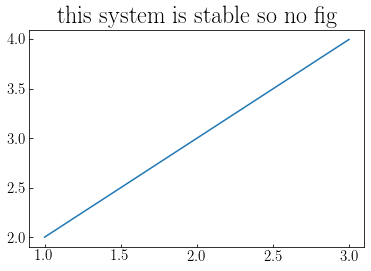

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_8_1e-05


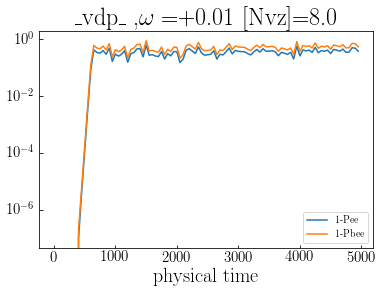

fd_NIS_flat_vdp_yvnmys_nnm_N1_Asl_non_mu_100_Lmu_300_ar_0.7_run2
1_4_1e-05


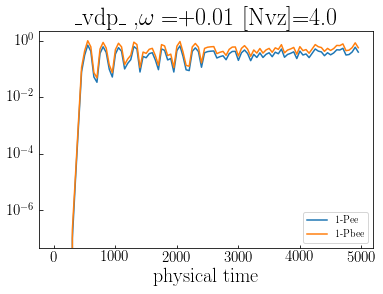

In [28]:
#plot angle beams grow asl
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
#import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'NIS' not in h:
        #print('flat conti')
        continue
    """if 'hetg' not in h:
        #print('hetg pui conti')
        continue"""
    if 'N1' not in h:
        #print('n1 conti')
        continue
    if 'run2'  not in h:
        #print('pb conti')
        continue
    if 'N1_Asl_'  not in h:
        #print('pb conti')
        continue
    if 'yvnmys' not in h:
        #print('pb conti')
        continue
    if 'nnm'  not in h:
        #print('inm conti')
        continue
    if 'vdp' not in h:
        continue
    cc=0
    if '_mu_' in h:
        #print(h)
        if 'pb' in h:
            pb=h[h.find('pb')+2:]
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        if 'nnm' in h:
            mo='+'
        elif 'inm' in h:
            mo='-'
        else:
            mo=''
        if 'vip' in h:
            vp='_vip_'
        if 'vdp' in h:
            vp='_vdp_'
        """if 'rapv' not in h:
            if 'rap' in h:
                rp='rap'
            else:
                rp=''
        else:
            rp='rapv'"""
        if 'od2' in h:
            od='od2'
        else:
            od=''
        for i in os.listdir(path+'/'+h):
            #print(i[i.find('COSEnu/')+7:])
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                #print(Para,'para')
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                if CFL !=10**-5:
                    continue
                #print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/'+i+'_survival_probability.jpg'
                if os.path.exists(pign):
                    #print('pig exit conti')
                    #continue
                    trash=1
                #print(path+'/'+h+'/'+i)
                #print(i,'i')
                #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                #print(DATA)
                fn = path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat'
                if os.path.isfile(fn)==False:
                    print(fn)
                    print('no csv conti')
                    continue
                print(h)
                print(i)
                DATA = pd.read_csv(fn, sep='\t',names=["time","Pee","Pbee"])
                #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                DATA = DATA.drop(index=0)
                toflo = {'time':float}
                DATA = DATA.astype(toflo)
                #pd.to_numeric(DATA["time"])
                """for j in DATA["time"]:
                    print(j)
                    print(type(j))"""
                DATA["physical time"]=DATA["time"].multiply(CFL*dz)
                DATA["1-Pee"]=1-DATA["Pee"]
                DATA["1-Pbee"]=1-DATA["Pbee"]
                if len(DATA.index[DATA['1-Pee']>0].tolist()) == 0:
                    plt.plot([1,2,3],[2,3,4])
                    plt.title('this system is stable so no fig')
                    plt.savefig(pign)
                    plt.show()
                    plt.close('all')
                    continue
                #plt.title("dz,dt")
                #print(DATA.head(),'DATA head')
                #print(DATA.columns,'DATA[[0]]')
                #print(DATA)
                if 'pb' in h:
                    DATA.plot(x="physical time",y=["Pee","Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+' [Nz,-$log_{10}$'+r'$\epsilon]$='+str(int(Nz))+', '+pb)
                else:
                    DATA.plot(x="physical time",y=["1-Pee","1-Pbee"],title=vp+' '+od+',$\omega=$'+mo+(str(1/float(mu)))[:5]+r' [Nvz]='+str(Nvz))
                #cc+=1
                #plt.show()
                #sys.exit()
                #DATA.plot(x="time",y="Pbee")#
                """if 'tur' in h:
                    plt.title("Averaged survival probability (tur) "+i)
                if 'non' in h:
                    plt.title("Averaged survival probability (w/o tur) "+i)"""
                plt.yscale('log')
                plt.show()
                #DATA.plot()
                #plt.savefig(pign)
                plt.close('all')
                #plt.show()
                #plt.plot()